<a href="https://colab.research.google.com/github/reyshamarie/machine_learning/blob/main/machine_learning_for_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetic Prediction using Machine Learning**

**Objective**

 We will try to build a machine learning model to accurately predict whether  or not the patients in the dataset have diabetes

**Dataset details**




# **Step 1:Import libraries and Dataset**

In [2]:
#packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
#read the diabetes dataset
import pandas as pd
diabetes = pd.read_csv("/gdrive/My Drive/Colab Notebooks/assignment1/pima-indians-diabetes.csv")

# **Step 2: Data Reading**

In [5]:
#preview the data
diabetes.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#data dimension

diabetes.shape

(768, 9)

In [7]:
#features of data(data type)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#statistic summary
diabetes.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes['class'].value_counts()

,count
class,
0,500
1,268


In [10]:
diabetes.groupby('class').mean()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# **Step 3: Data Cleaning**

1. Checking null values

In [11]:
print(diabetes.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [12]:
diabetes=diabetes.copy(deep = True)

diabetes[['preg','plas','pres','skin','test','mass']]=diabetes[['preg','plas','pres','skin','test','mass']].replace(0,np.nan)

print(diabetes.isnull().sum())

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64


In [13]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

def plot_missing_values_interactive(data):
    # Calculate the number of missing values per column
    missing_counts = data.isnull().sum()
    # Filter out columns with no missing values
    missing_counts = missing_counts[missing_counts > 0]

    # Calculate the percentage of missing values
    percentage_missing = (missing_counts / len(data) * 100).round(2)

    # Define a similar color scheme to "crest"
    crest_colors = ['#9B9EBC', '#6E6F8C', '#4C4E6A', '#2E2F45']

    # Create a bar trace with data labels
    trace = go.Bar(
        x=missing_counts.index,
        y=missing_counts.values,
        text=missing_counts.values,  # Data labels
        textposition='outside',      # Position of the text
        marker=dict(color=crest_colors[0], line=dict(color='#000000', width=1.5))
    )

    # Create layout
    layout = go.Layout(
        title='Missing Values per Column',
        xaxis=dict(title='Columns'),
        yaxis=dict(title='Number of Missing Values'),
        template='plotly_white'
    )

    # Create figure
    fig = go.Figure(data=[trace], layout=layout)

    # Show the plot
    pyo.iplot(fig)

# Example usage
plot_missing_values_interactive(diabetes)

Filling the Nan values --- To fill these Nan values the data distribution needs to be understood, for that we are taking the hist plot for the dataset

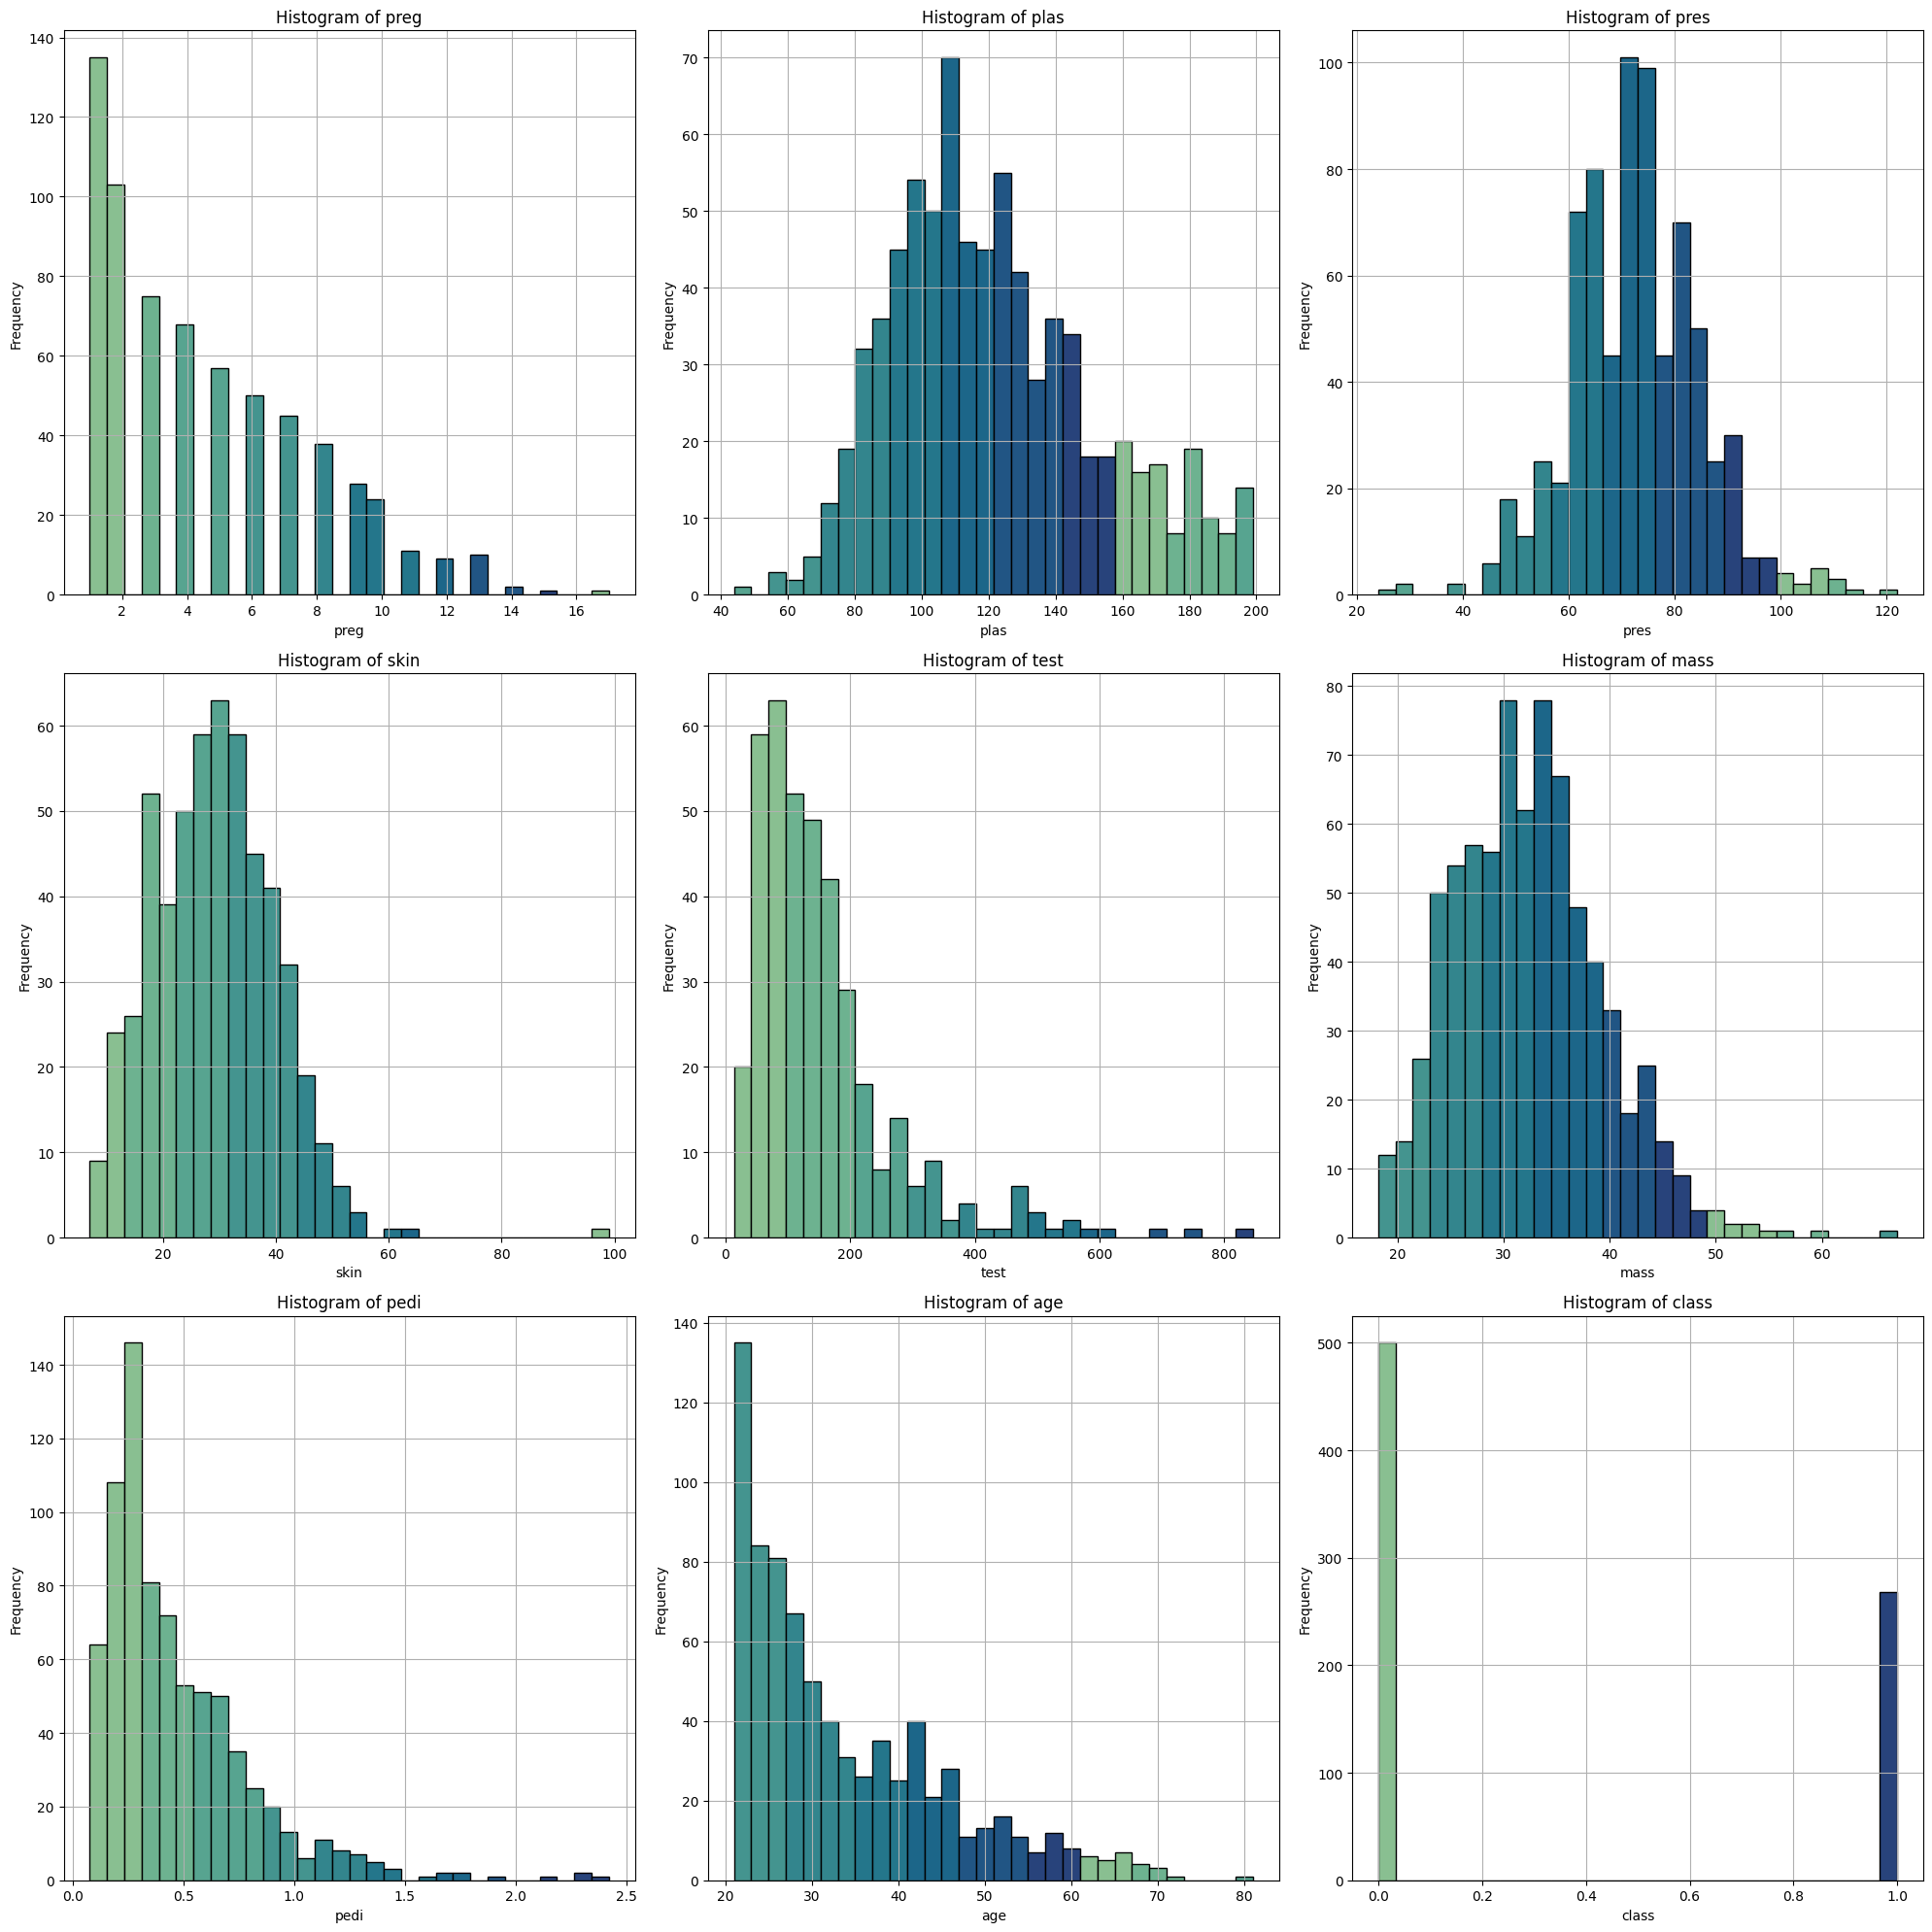

In [14]:
# Define the color palette
palette = sns.color_palette("crest", len(diabetes.columns))

# Create histograms using DataFrame.hist()
p = diabetes.hist(figsize=(20, 20), bins=30, edgecolor='black')

# Iterate through each subplot and apply the color from the palette
for ax, column in zip(p.flatten(), diabetes.columns):
    # Set the color for the histogram bars
    for patch in ax.patches:
        # Calculate the color index based on the number of bins
        color_index = int(patch.get_x() / (patch.get_width() * len(ax.patches)) * len(palette))
        patch.set_facecolor(palette[color_index % len(palette)])

    # Set title and labels
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Left-Skewed (Negative Skew): Mean < Median, long left tail.
Right-Skewed (Positive Skew): Mean > Median, long right tail.


Impute nan values for the columns in accordance with their distribution




In [15]:
diabetes['plas'].fillna(diabetes['plas'].mean(), inplace = True)
diabetes['pres'].fillna(diabetes['pres'].mean(), inplace = True)
diabetes['skin'].fillna(diabetes['skin'].median(), inplace = True)
diabetes['test'].fillna(diabetes['test'].median(), inplace = True)
diabetes['mass'].fillna(diabetes['mass'].median(), inplace = True)

In [16]:
print(diabetes.isnull().sum())

preg     111
plas       0
pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class      0
dtype: int64


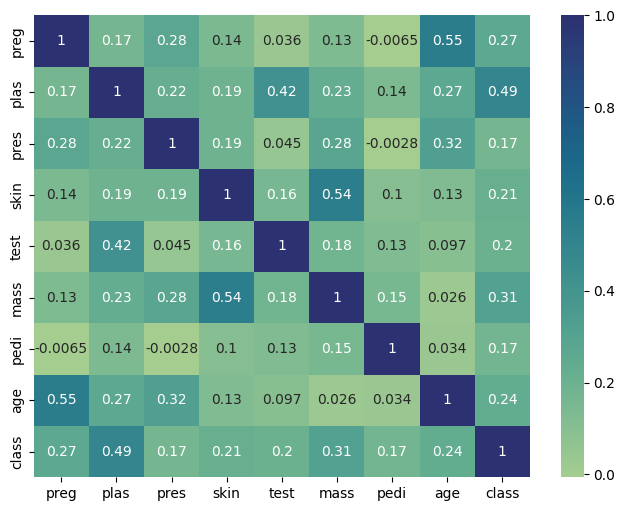

In [17]:
plt.figure(figsize=(8,6))
# on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='crest')
# seaborn has very simple solution for heatmap

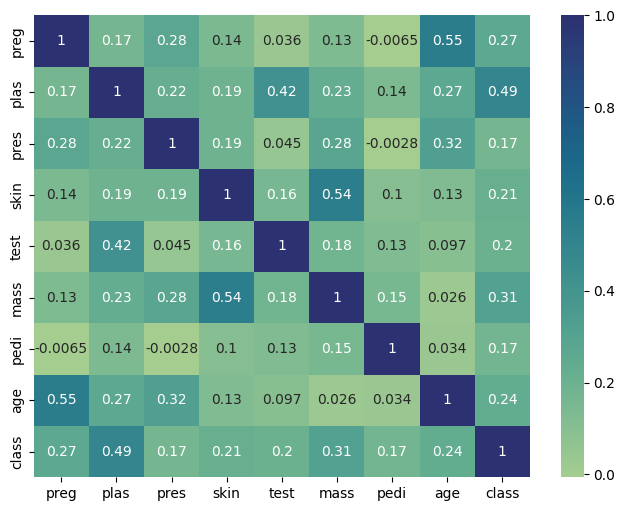

In [18]:
plt.figure(figsize=(8,6))
# on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='crest')
# seaborn has very simple solution for heatmap

In [19]:
# Check for duplicate rows
duplicate_rows = diabetes[diabetes.duplicated()]

# Display the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows (optional)
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [preg, plas, pres, skin, test, mass, pedi, age, class]
Index: []


In [20]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["class"],axis = 1),),
        columns=['preg', 'plas', 'pres', 'skin', 'test',
       'mass', 'pedi', 'age'])

In [21]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.468243,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-1.087043,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.090358,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-1.087043,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,NaN,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


# **Step 4: Data Analysis**

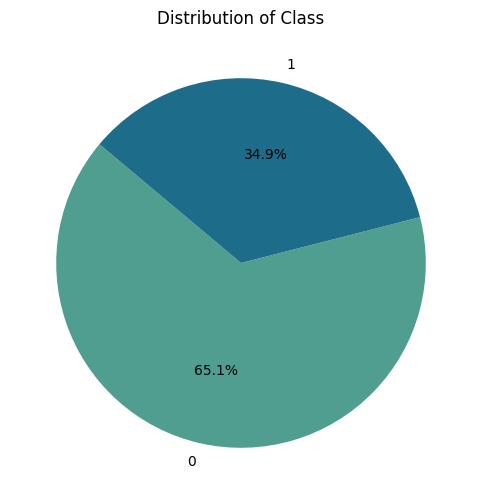

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data loading
# diabetes_dataset = pd.read_csv('path_to_your_dataset.csv')

# Calculate the value counts of the 'Outcome' column
outcome_counts = diabetes['class'].value_counts()

# Define the color palette
palette = sns.color_palette("crest", len(outcome_counts))

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)

# Title of the plot
plt.title('Distribution of Class')

# Display the plot
plt.show()

<ipython-input-24-db66f9b27383>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-db66f9b27383>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-db66f9b27383>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-db66f9b27383>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-db66f9b27383>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

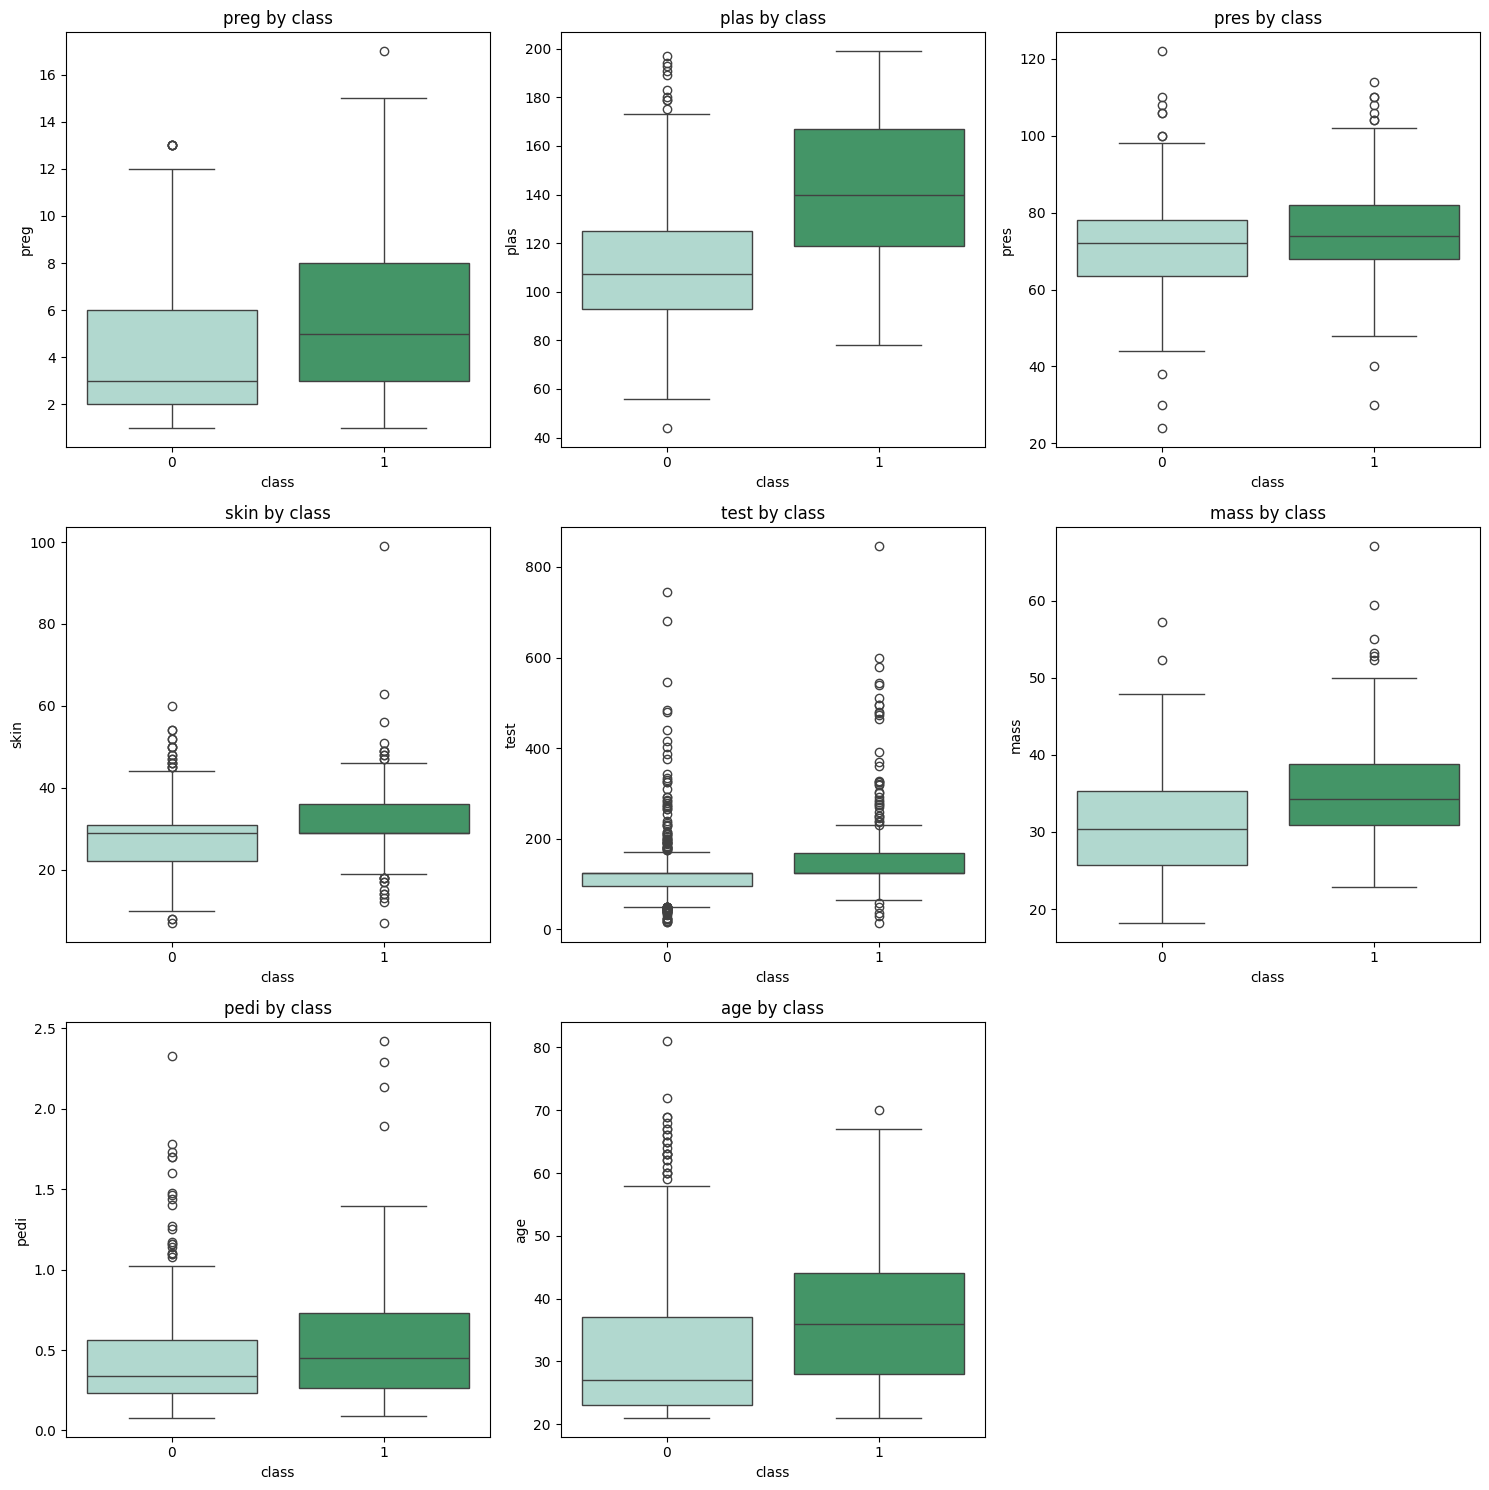

In [24]:
features = diabetes.drop(columns='class')
target = diabetes['class']


def plot_boxplots(data, target, target_name='class'):
    num_features = data.shape[1]
    num_rows = (num_features + 2) // 3  # Determine number of rows for subplot grid

    plt.figure(figsize=(15, num_rows * 5))

    for i, feature in enumerate(data.columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(x=target, y=data[feature], palette='BuGn')
        plt.title(f'{feature} by {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Example usage
plot_boxplots(features, target)

<ipython-input-25-145e8b487340>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-145e8b487340>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-145e8b487340>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-145e8b487340>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-145e8b487340>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

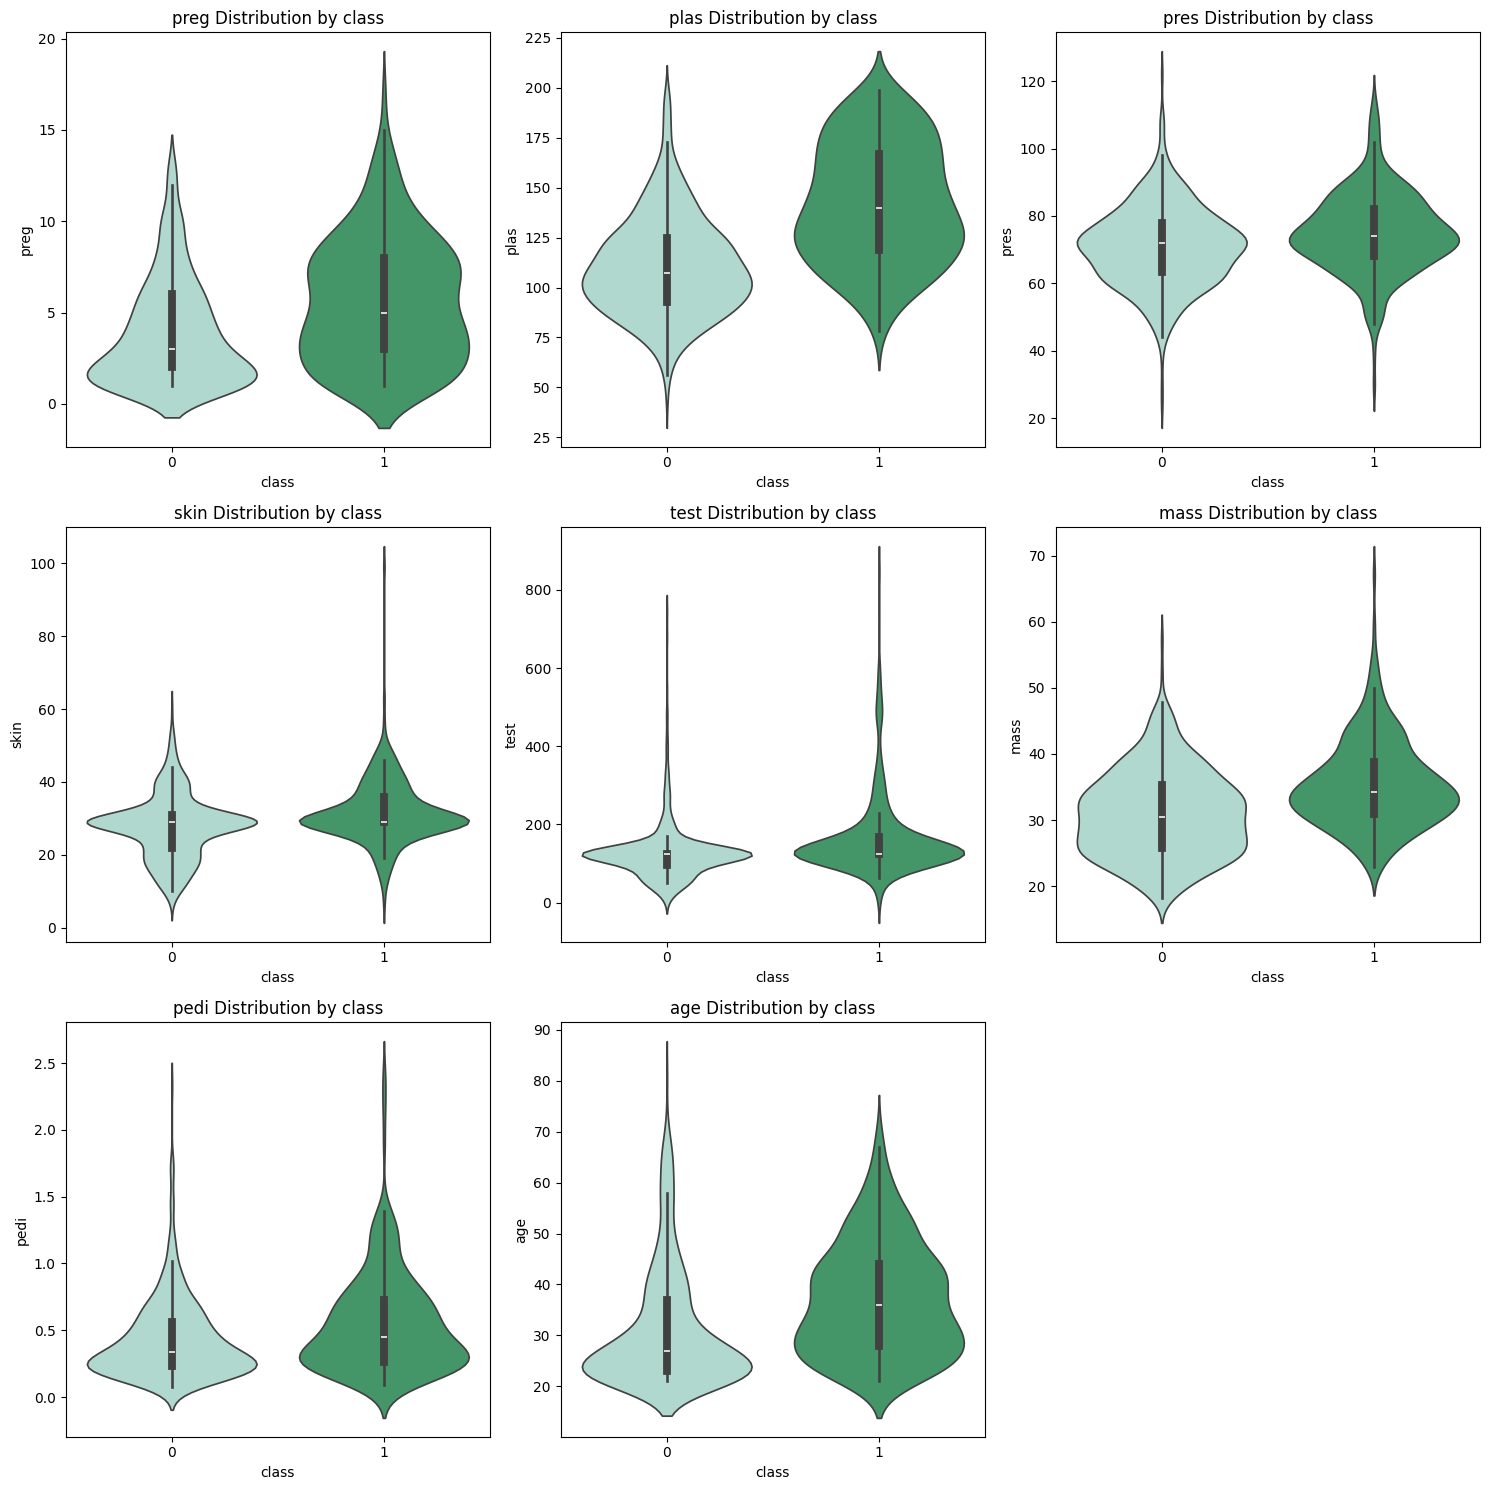

In [25]:
def plot_violinplots(data, target, target_name='class'):
    num_features = data.shape[1]
    num_rows = (num_features + 2) // 3  # Determine number of rows for subplot grid

    plt.figure(figsize=(15, num_rows * 5))

    for i, feature in enumerate(data.columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.violinplot(x=target, y=data[feature], palette='BuGn')
        plt.title(f'{feature} Distribution by {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Example usage
plot_violinplots(features, target)

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




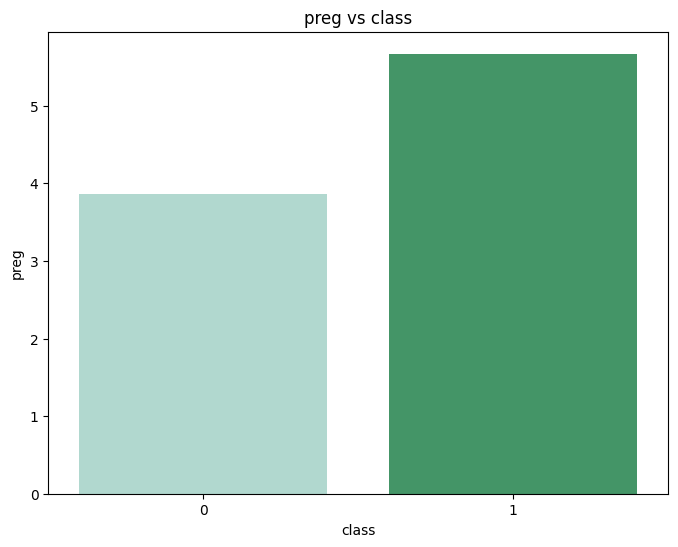

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




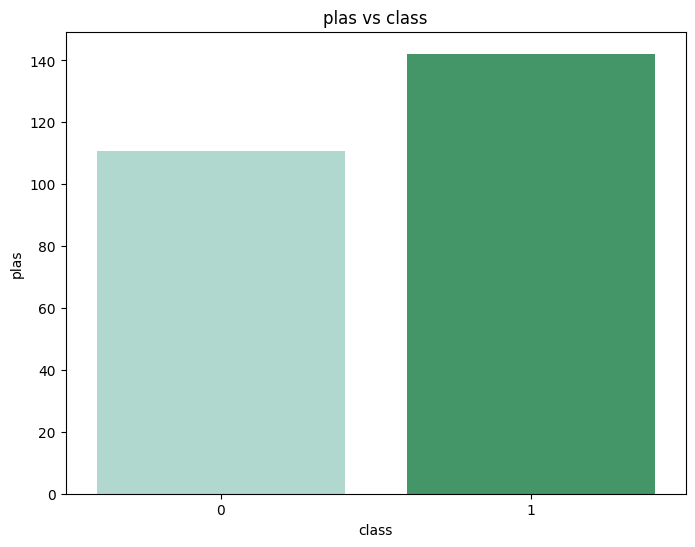

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




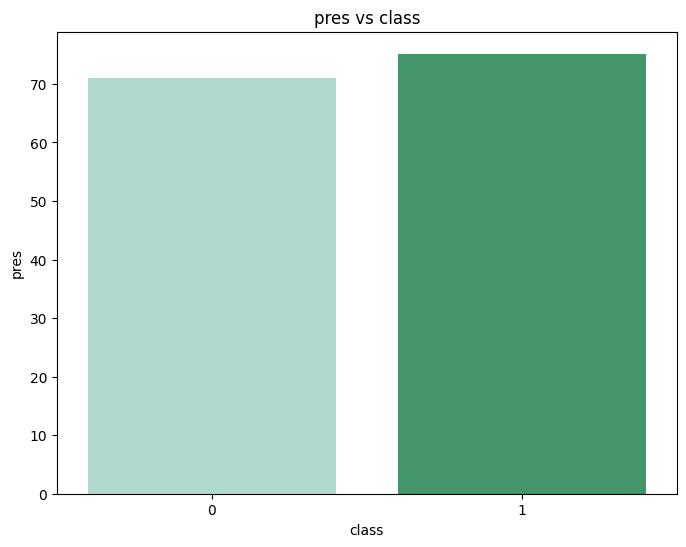

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




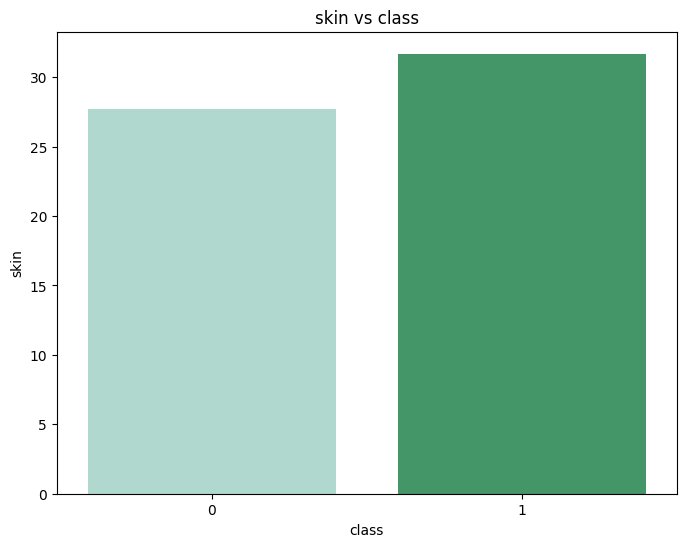

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




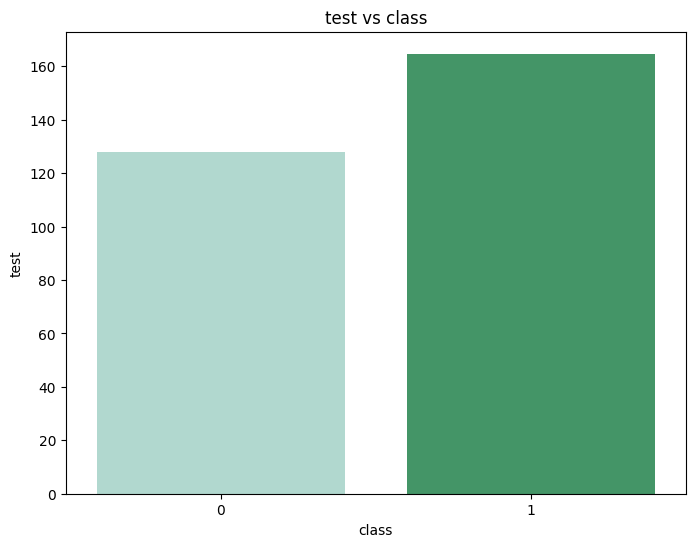

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




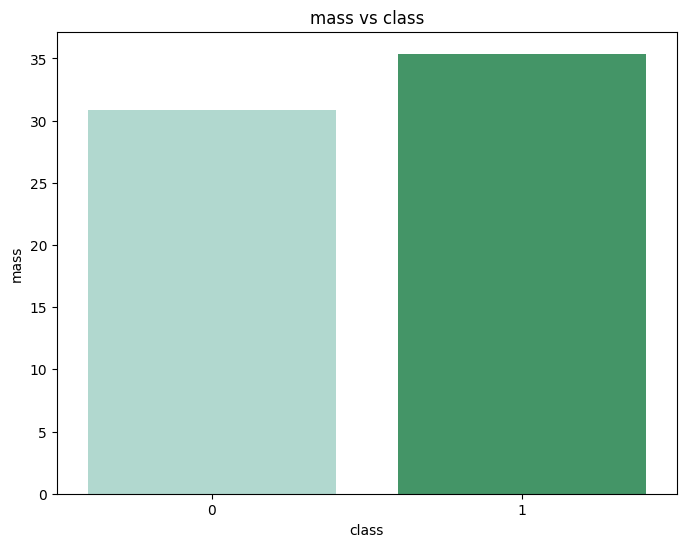

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




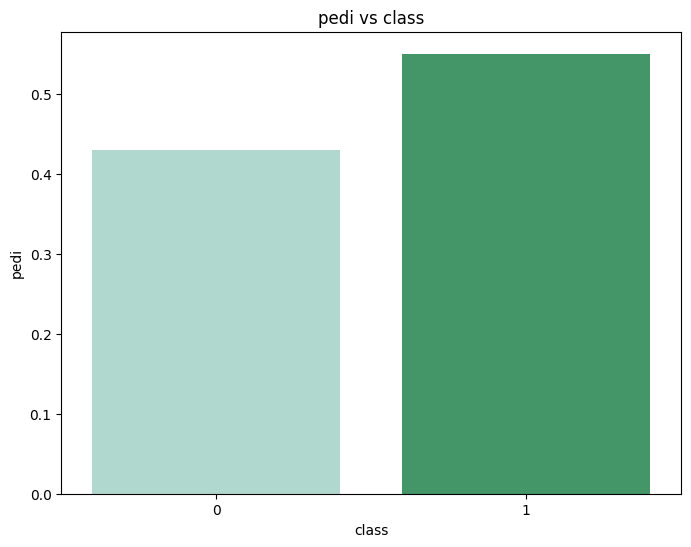

<ipython-input-27-760107e31751>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




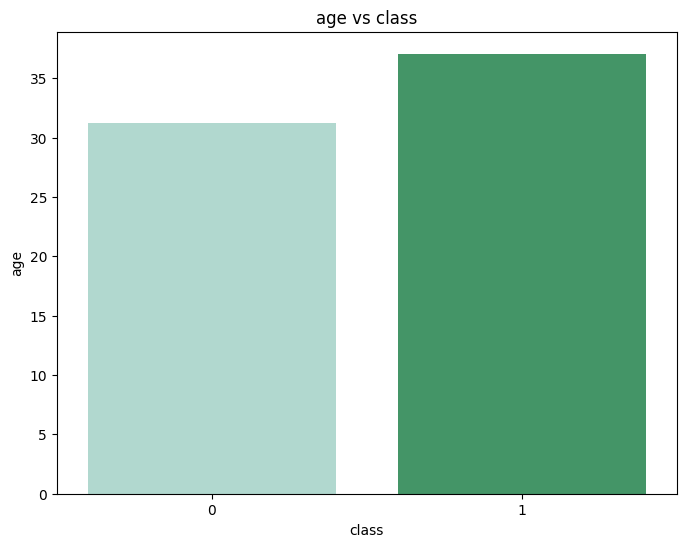

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_individual_barplots_with_labels(data, target, target_name='class'):
    for feature in data.columns:
        plt.figure(figsize=(8, 6))  # Set the size of each plot to 8x6 inches

        # Create a DataFrame for plotting
        plot_data = pd.concat([data[feature], target], axis=1)
        plot_data.columns = [feature, target_name]

        # Calculate mean of feature values for each outcome class
        mean_values = plot_data.groupby(target_name)[feature].mean().reset_index()

        # Create the bar plot
        ax = sns.barplot(x=mean_values[target_name], y=mean_values[feature], palette='BuGn')
        plt.title(f'{feature} vs {target_name}')
        plt.xlabel(target_name)
        plt.ylabel(feature)


        plt.show()  # Display each plot individually

# Example usage
plot_individual_barplots_with_labels(features, target)

Bivariate Analysis

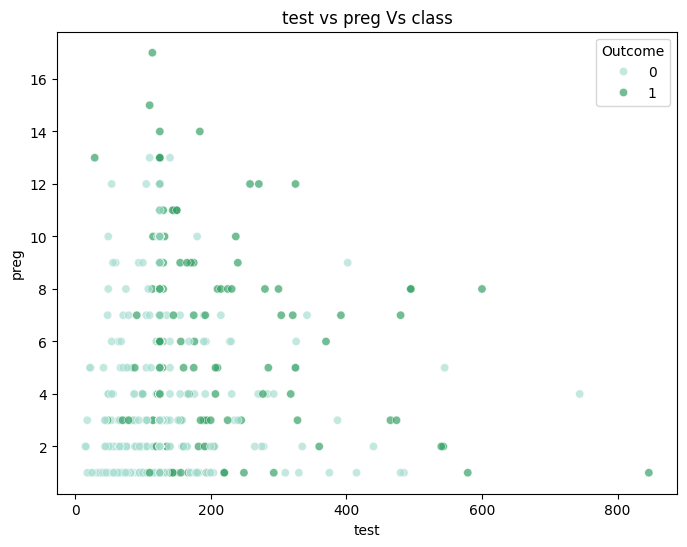

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_insulin_pregnancies(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['test', 'preg']], target], axis=1)
    plot_data.columns = ['test', 'preg', target_name]

    # Create a scatter plot with hue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='test', y='preg', hue=target_name, data=plot_data, palette='BuGn', alpha=0.7)

    # Add plot details
    plt.title('test vs preg Vs class')
    plt.xlabel('test')
    plt.ylabel('preg')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_scatter_insulin_pregnancies(features, target)

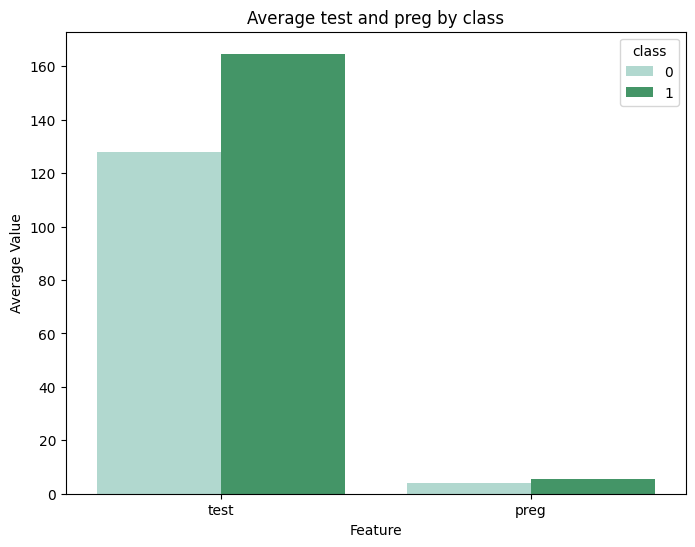

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_barplots(data, target, target_name='class'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['test', 'preg']], target], axis=1)
    plot_data.columns = ['test', 'preg', target_name]

    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()

    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name='Average Value')

    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y='Average Value', hue=target_name, data=avg_values_melted, palette='BuGn')

    # Add plot details
    plt.title('Average test and preg by class')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_grouped_barplots(features, target)

In [33]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    657 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


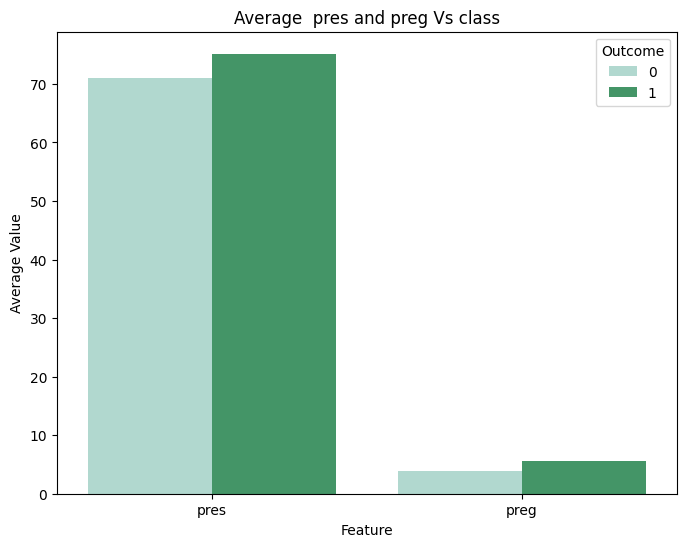

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_barplots(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['pres', 'preg']], target], axis=1)
    plot_data.columns = ['pres', 'preg', target_name]

    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()

    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name='Average Value')

    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y='Average Value', hue=target_name, data=avg_values_melted, palette='BuGn')

    # Add plot details
    plt.title('Average  pres and preg Vs class')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_grouped_barplots(features, target)

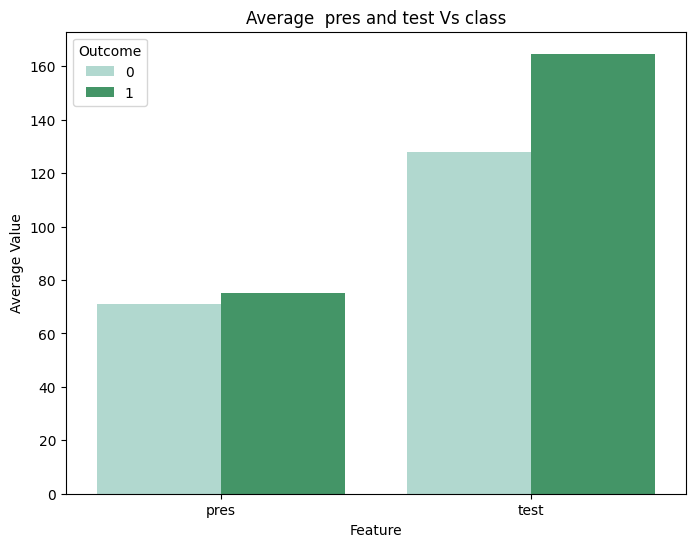

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_barplots(data, target, target_name='Outcome'):
    # Combine features and target variable into one DataFrame
    plot_data = pd.concat([data[['pres', 'test']], target], axis=1)
    plot_data.columns = ['pres', 'test', target_name]

    # Aggregate data: mean values for each outcome class
    avg_values = plot_data.groupby(target_name).mean().reset_index()

    # Melt the DataFrame to long format for plotting
    avg_values_melted = avg_values.melt(id_vars=target_name, var_name='Feature', value_name='Average Value')

    # Create grouped bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Feature', y='Average Value', hue=target_name, data=avg_values_melted, palette='BuGn')

    # Add plot details
    plt.title('Average  pres and test Vs class')
    plt.xlabel('Feature')
    plt.ylabel('Average Value')
    plt.legend(title=target_name)

    plt.show()

# Example usage
plot_grouped_barplots(features, target)

# **Step 5: Data Preparation**

In [38]:
# Assuming 'features' and 'target' are your DataFrame and Series
X = features
y = target

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


# **Step 6: Data Modeling**

# Logistic Regression

In [41]:
#importing SimpleImputer
from sklearn.impute import SimpleImputer
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Now use the imputed data for training your model
reg.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [44]:
#importing SimpleImputer
from sklearn.impute import SimpleImputer
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Now use the imputed data for training your model
reg.fit(X_train_imputed, y_train)

# Make predictions using the imputed test data
y_pred=reg.predict(X_test_imputed)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

# Use X_train_imputed instead of X_train to calculate the score
print("Training Score:\n",reg.score(X_train_imputed,y_train)*100)

print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.71      0.57      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
 [[96 11]
 [20 27]]
Training Score:
 76.54723127035831
Mean Squared Error:
 0.2012987012987013
R2 score is:
 0.05070590574666933


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



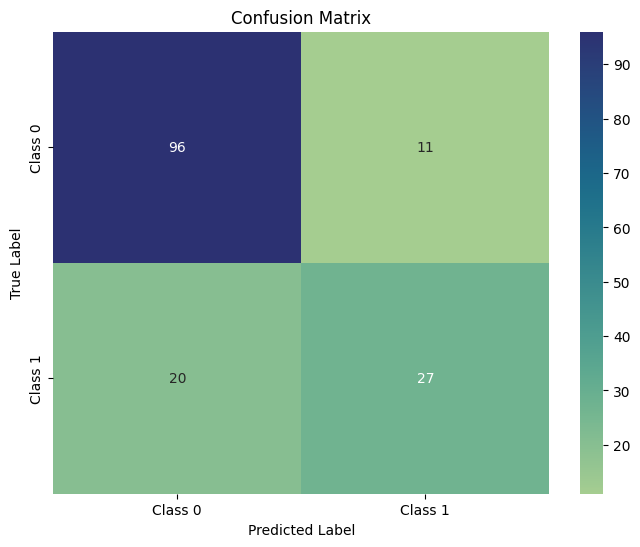

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print(accuracy_score(y_test,y_pred)*100)

79.87012987012987
